<a id='header'></a>
# Principal Component Analysis (PCA)

In this notebook we present the PCA-related functionalities from the ``reduction`` module.

### PCA functionalities

- [**Section 1**](#global_local_pca): We present how *global and local PCA* can be performed using `PCA` class from the `reduction` module.
- [**Section 2**](#plotting_pca): We present the plotting functionalities from the `reduction` module for viewing PCA results.

***

**Should plots be saved?**

In [1]:
save_plots = False

***
<a id='global_local_pca'></a>
## Global vs. local PCA

[**Go up**](#header)

In [2]:
from PCAfold import preprocess
from PCAfold import reduction
from PCAfold import PCA
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

# Set some initial parameters:
global_color = '#6a6e7a'
k1_color = '#0e7da7'
k2_color = '#ceca70'
PC_color = '#000000'
data_point = 4
font_text = 20
line_width = 1
n_points = 1000

# Fonts:
csfont = {'fontname':'Charter', 'fontweight':'regular'}
hfont = {'fontname':'Charter', 'fontweight':'bold'}

# Function for plotting:
def plot_data_set(x, y, title_text=''):
    
    figure = plt.figure(figsize=(8, 5))
    figureSubplot = plt.subplot(1,1,1)
    plt.scatter(x, y, color=global_color, marker='.', linewidth=data_point-2)
    plt.xticks([]), plt.yticks([])
    plt.grid(alpha=0.2)
    plt.title(title_text, **csfont, fontsize=font_text, color=PC_color)

Create a function that will perform PCA transformation on local portions of the data set:

In [3]:
def local_pca(X, idx):

    n_clusters = len(np.unique(idx))

    # Initialize the outputs:
    eigenvectors = []
    eigenvalues = []
    principal_components = []

    for k in range(0, n_clusters):

        # Extract local cluster:
        X_k = X[idx==k,:]

        # Perform PCA in a local cluster:
        pca = PCA(X_k, scaling='none', n_components=2, use_eigendec=True)
        Z = pca.transform(X_k, nocenter=False)
        
        # Save the local eigenvectors, eigenvalues and PCs:
        eigenvectors.append(pca.A)
        eigenvalues.append(pca.L)
        principal_components.append(Z)

    return (eigenvectors, eigenvalues, principal_components)

***

### Generate synthetic data set on which global PCA will be performed:

This data set is composed of a single cloud:

In [4]:
mean_global = [0,1]
covariance_global = [[3.4, 1.1], [1.1, 2.1]]

x_noise, y_noise = np.random.multivariate_normal(mean_global, covariance_global, n_points).T
y_global = np.linspace(0,4,n_points)
x_global = -(y_global**2) + 7*y_global + 4
y_global = y_global + y_noise
x_global = x_global + x_noise

Dataset_global = np.hstack((x_global[:,np.newaxis], y_global[:,np.newaxis]))

Visualize the data set:

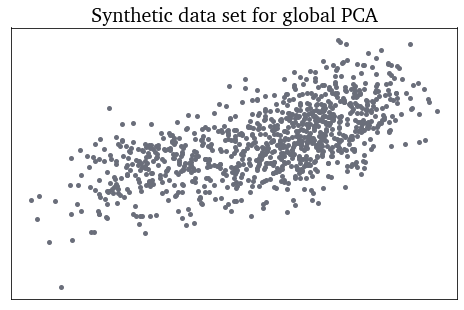

In [5]:
plot_data_set(x_global, y_global, 'Synthetic data set for global PCA')
if save_plots==True: plt.savefig('../images/tutorial-pca-data-set-for-global-pca.png', dpi = 500, bbox_inches='tight')

Perform PCA transformation of the data set:

In [6]:
# Perform PCA:
pca = PCA(Dataset_global, 'none', n_components=2)
PC_scores_global = pca.transform(Dataset_global, nocenter=False)
eigenvectors_global = pca.A
eigenvalues_global = pca.L

# Centered data set:
Dataset_global_pp = pca.X_cs

***

### Generate synthetic data set on which local PCA will be performed

This data set is composed of two distinct clouds:

In [7]:
mean_local_1 = [0,1]
mean_local_2 = [6,4]
covariance_local_1 = [[2, 0.5], [0.5, 0.5]]
covariance_local_2 = [[3, 0.3], [0.3, 0.5]]

x_noise_1, y_noise_1 = np.random.multivariate_normal(mean_local_1, covariance_local_1, n_points).T
x_noise_2, y_noise_2 = np.random.multivariate_normal(mean_local_2, covariance_local_2, n_points).T
x_local = np.concatenate([x_noise_1, x_noise_2])
y_local = np.concatenate([y_noise_1, y_noise_2])

Dataset_local = np.hstack((x_local[:,np.newaxis], y_local[:,np.newaxis]))

Visualize the data set:

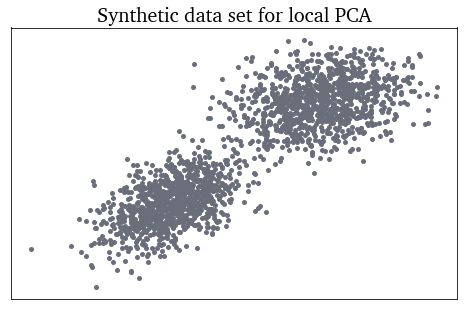

In [8]:
plot_data_set(x_local, y_local, 'Synthetic data set for local PCA')
if save_plots==True: plt.savefig('../images/tutorial-pca-data-set-for-local-pca.png', dpi = 500, bbox_inches='tight')

Cluster the data set using two pre-defined bins:

In [9]:
(idx, borders) = preprocess.predefined_variable_bins(Dataset_local[:,0], [2.5], verbose=False)
centroids = preprocess.get_centroids(Dataset_local, idx)

Perform local PCA:

In [10]:
(eigenvectors_local, eigenvalues_local, _) = local_pca(Dataset_local, idx)

***

### Plotting global vs. local PCA

Plot the identified eigenvectors on the data set where global PCA was performed and on the data set where local PCA was performed:

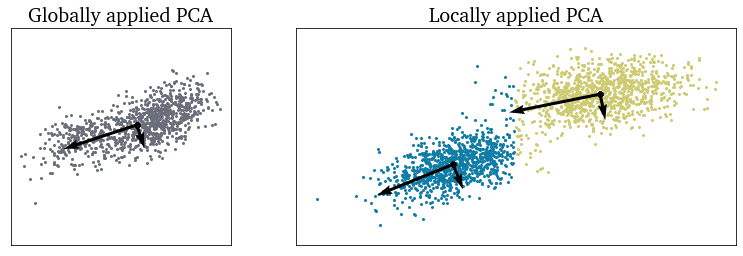

In [11]:
figure = plt.figure(figsize=(13, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

# First subplot - global PCA:
figureSubplot = plt.subplot(gs[0])
plt.scatter(Dataset_global_pp[:,0], Dataset_global_pp[:,1], s=data_point, color=global_color, marker='o', linewidth=line_width)

# Plot global eigenvectors:
plt.quiver(eigenvectors_global[0,0], eigenvectors_global[1,0], scale=30*(1-eigenvalues_global[0]), color=PC_color, width=0.014)
plt.quiver(eigenvectors_global[0,1], eigenvectors_global[1,1], scale=10*(1-eigenvalues_global[1]), color=PC_color, width=0.014)

plt.axis('equal')
plt.yticks([]), plt.xticks([])
plt.title('Globally applied PCA', **csfont, fontsize=font_text, color=PC_color)

# Plot global centroid:
plt.scatter(0, 0, color=PC_color, marker='x', lineWidth=data_point, s=20);

# Second subplot - local PCA:
figureSubplot = plt.subplot(gs[1])
plt.scatter(Dataset_local[idx==0,0], Dataset_local[idx==0,1], s=data_point, c=k1_color, marker='o')
plt.scatter(Dataset_local[idx==1,0], Dataset_local[idx==1,1], s=data_point, c=k2_color, marker='o')

# Plot local eigenvectors:
origin = [centroids[0][0]], [centroids[0][1]]
plt.quiver(*origin, eigenvectors_local[0][0,0], eigenvectors_local[0][1,0], scale=30*(1-eigenvalues_local[0][0]), color=PC_color, width=0.007)
plt.quiver(*origin, eigenvectors_local[0][0,1], eigenvectors_local[0][1,1], scale=20*(1-eigenvalues_local[0][1]), color=PC_color, width=0.007)

origin = [centroids[1][0]], [centroids[1][1]]
plt.quiver(*origin, eigenvectors_local[1][0,0], eigenvectors_local[1][1,0], scale=30*(1-eigenvalues_local[1][0]), color=PC_color, width=0.007)
plt.quiver(*origin, eigenvectors_local[1][0,1], eigenvectors_local[1][1,1], scale=20*(1-eigenvalues_local[1][1]), color=PC_color, width=0.007)

plt.axis('equal')
plt.yticks([]), plt.xticks([])
plt.title('Locally applied PCA', **csfont, fontsize=font_text, color=PC_color)

# Plot local centroids:
plt.scatter(centroids[:, 0], centroids[:, 1], color=PC_color, marker='x', lineWidth=data_point, s=20);

if save_plots==True: plt.savefig('../images/tutorial-pca-global-local-pca.png', dpi = 500, bbox_inches='tight')

***
<a id='plotting_pca'></a>
## Plotting PCA results

[**Go up**](#header)

Below we demonstrate plotting PCA results using the functions available in the ``reduction`` module.

In [12]:
# Set some initial parameters:
title = None
save_filename = None
X_names = ['$T$', '$H_2$', '$O_2$', '$O$', '$OH$', '$H_2O$', '$H$', '$HO_2$', '$CO$', '$CO_2$', '$HCO$']

# Upload the sample data set:
X = np.genfromtxt('data-state-space.csv', delimiter=',')

Create three PCA objects corresponding to different data scaling criteria:

In [13]:
pca_X_Auto = PCA(X, scaling='auto', n_components=2)
pca_X_Range = PCA(X, scaling='range', n_components=2)
pca_X_Vast = PCA(X, scaling='vast', n_components=2)
pca_X_Pareto = PCA(X, scaling='pareto', n_components=2)

### Eigenvectors

Plot eigenvectors from one of the scaling options:

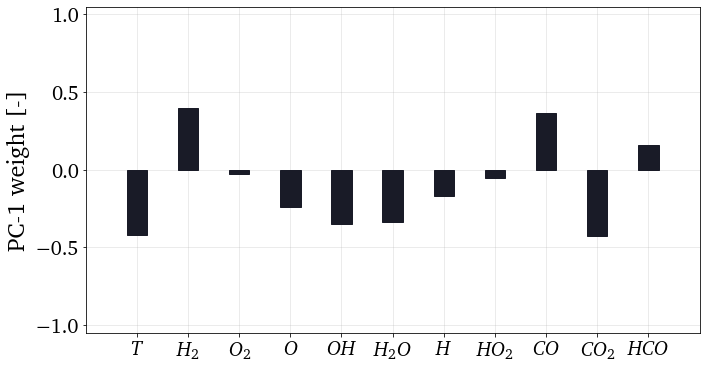

In [14]:
if save_plots == True: save_filename = 'plotting-pca'
plt = reduction.plot_eigenvectors(pca_X_Auto.A[:,0], eigenvectors_indices=[], variable_names=X_names, plot_absolute=False, save_path='../images/', save_filename=save_filename)

Plot absolute values:

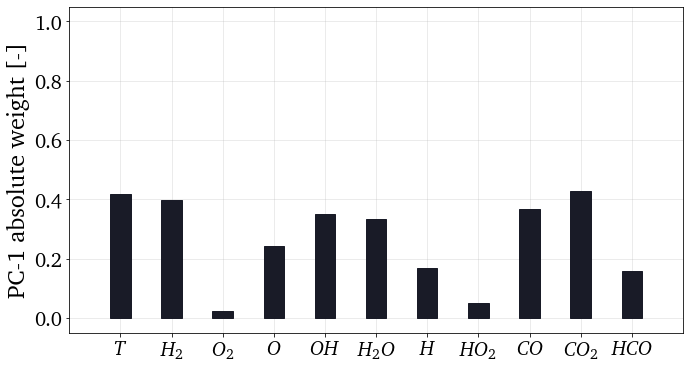

In [15]:
if save_plots == True: save_filename = 'plotting-pca-absolute'
plt = reduction.plot_eigenvectors(pca_X_Auto.A[:,0], eigenvectors_indices=[], variable_names=X_names, plot_absolute=True, save_path='../images/', save_filename=save_filename)

Plot comparison of eigenvectors from all scaling options:

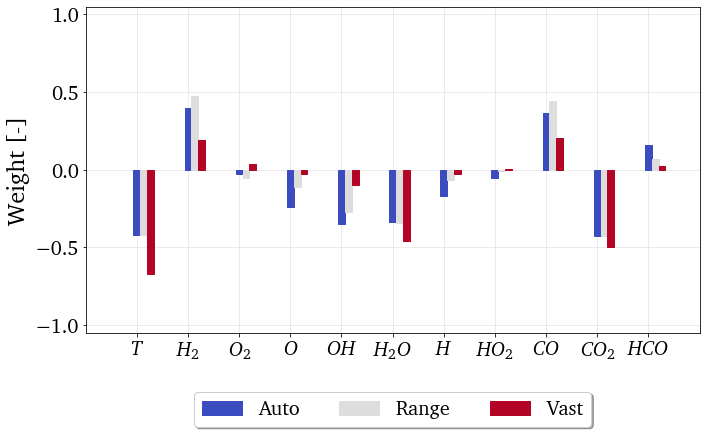

In [16]:
if save_plots == True: save_filename = '../images/plotting-pca-eigenvectors-comparison'
plt = reduction.plot_eigenvectors_comparison((pca_X_Auto.A[:,0], pca_X_Range.A[:,0], pca_X_Vast.A[:,0]), legend_labels=['Auto', 'Range', 'Vast'], variable_names=X_names, plot_absolute=False, color_map='coolwarm', save_filename=save_filename)

Plot absolute values:

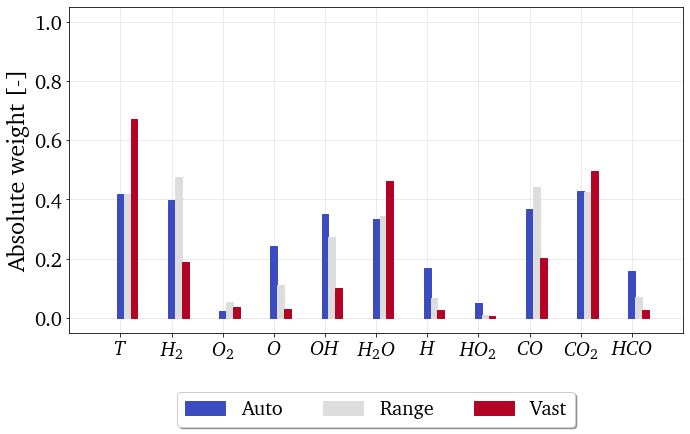

In [17]:
if save_plots == True: save_filename = '../images/plotting-pca-eigenvectors-comparison-absolute'
plt = reduction.plot_eigenvectors_comparison((pca_X_Auto.A[:,0], pca_X_Range.A[:,0], pca_X_Vast.A[:,0]), legend_labels=['Auto', 'Range', 'Vast'], variable_names=X_names, plot_absolute=True, color_map='coolwarm', save_filename=save_filename)

### Eigenvalues

Plot eigenvalue distribution:

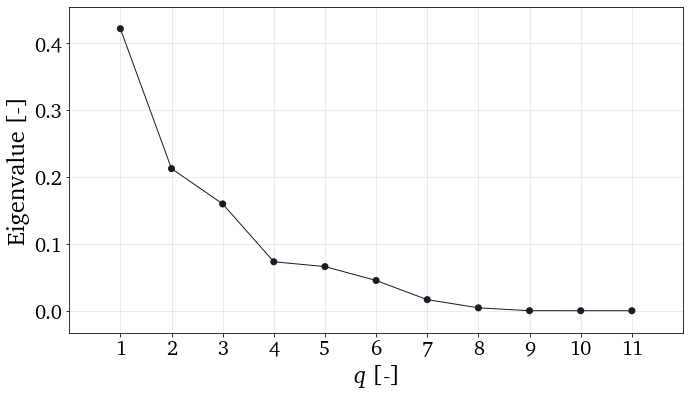

In [18]:
if save_plots == True: save_filename = '../images/plotting-pca-eigenvalue-distribution'
plt = reduction.plot_eigenvalue_distribution(pca_X_Auto.L, normalized=False, save_filename=save_filename)

Plot normalized eigenvalue distribution:

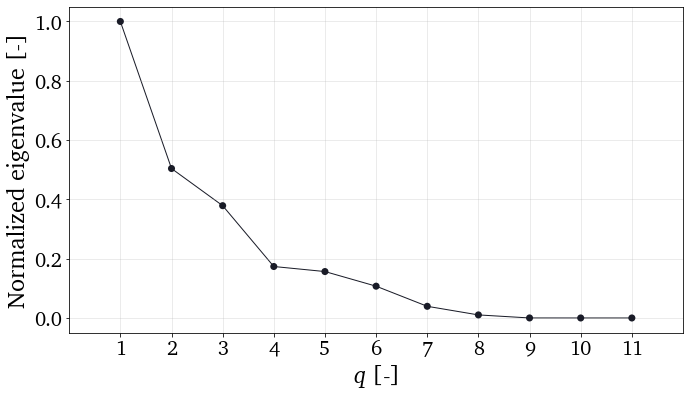

In [19]:
if save_plots == True: save_filename = '../images/plotting-pca-eigenvalue-distribution-normalized'
plt = reduction.plot_eigenvalue_distribution(pca_X_Auto.L, normalized=True, save_filename=save_filename)

Plot comparison of eigenvalues from all scaling options:

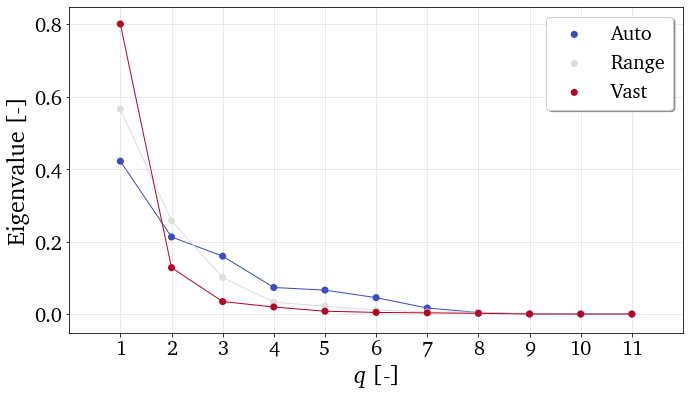

In [20]:
if save_plots == True: save_filename = '../images/plotting-pca-eigenvalue-distribution-comparison'
plt = reduction.plot_eigenvalue_distribution_comparison((pca_X_Auto.L, pca_X_Range.L, pca_X_Vast.L), legend_labels=['Auto', 'Range', 'Vast'], normalized=False, color_map='coolwarm', save_filename=save_filename)

Plot absolute values:

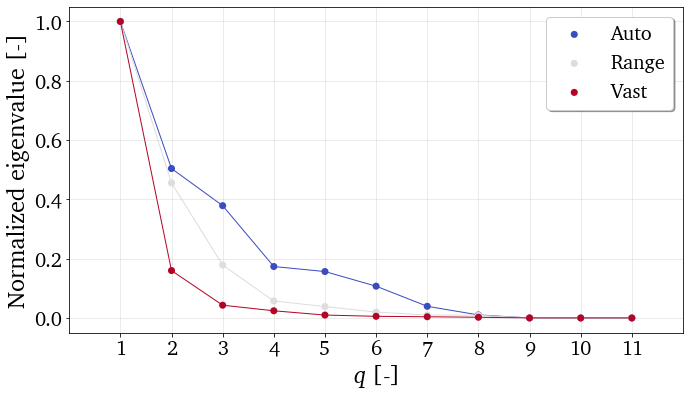

In [21]:
if save_plots == True: save_filename = '../images/plotting-pca-eigenvalue-distribution-comparison-normalized'
plt = reduction.plot_eigenvalue_distribution_comparison((pca_X_Auto.L, pca_X_Range.L, pca_X_Vast.L), legend_labels=['Auto', 'Range', 'Vast'], normalized=True, color_map='coolwarm', save_filename=save_filename)

### Cumulative variance

Plot cumulative variance:

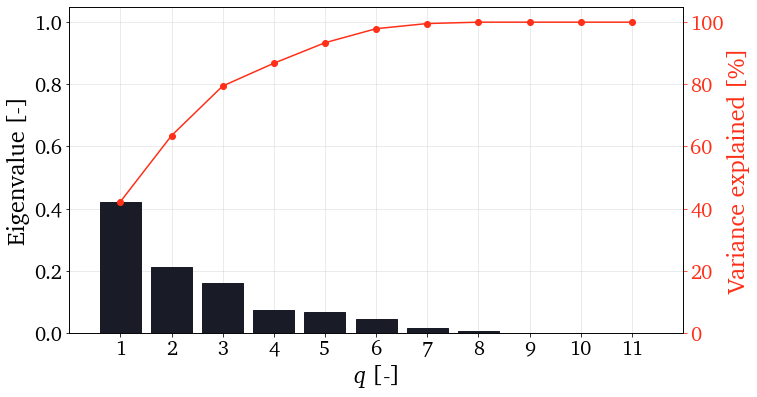

In [22]:
if save_plots: save_filename = '../images/cumulative-variance'
plt = reduction.plot_cumulative_variance(pca_X_Auto.L, n_components=0, save_filename=save_filename)

You can also truncate the number of eigenvalues:

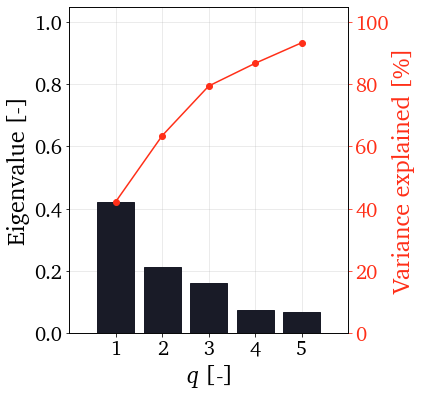

In [23]:
if save_plots: save_filename = '../images/cumulative-variance-truncated'
plt = reduction.plot_cumulative_variance(pca_X_Auto.L, n_components=5, save_filename=save_filename)

### Two-dimensional manifold

Finally, we transform the original data set to the new basis:

In [24]:
principal_components = pca_X_Vast.transform(X)

and we plot the two-dimensional manifold:

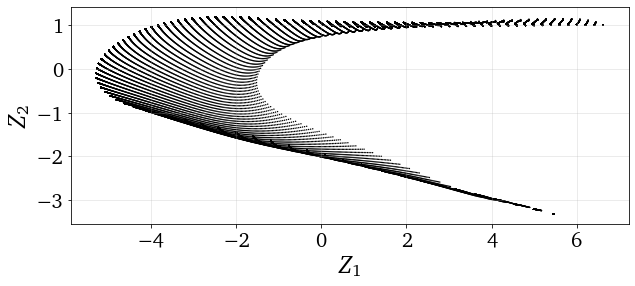

In [25]:
if save_plots: save_filename = '../images/plotting-pca-2d-manifold-black'
plt = reduction.plot_2d_manifold(principal_components[:,0], principal_components[:,1], color_variable='k', x_label='$Z_1$', y_label='$Z_2$', colorbar_label=None, figure_size=(10,4), save_filename=save_filename)

two-dimensional manifold colored by temperature variable:

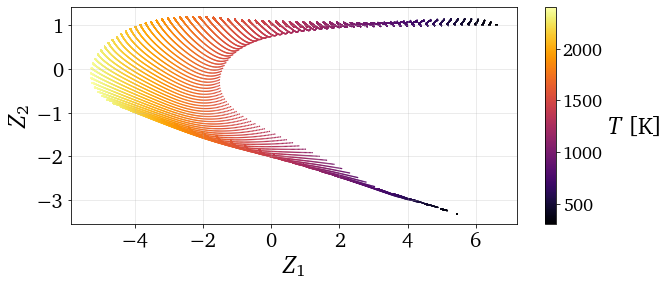

In [36]:
if save_plots: save_filename = '../images/plotting-pca-2d-manifold-inferno'
plt = reduction.plot_2d_manifold(principal_components[:,0], principal_components[:,1], color_variable=X[:,0], x_label='$Z_1$', y_label='$Z_2$', colorbar_label='$T$ [K]', color_map='inferno', figure_size=(10,4), save_filename=save_filename)

Note that you can select the colormap to use through `color_map` parameter. Here's an example of using `color_map='Blues'`:

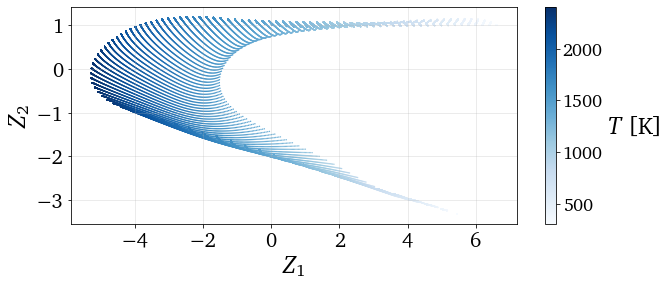

In [35]:
if save_plots: save_filename = '../images/plotting-pca-2d-manifold-blues'
plt = reduction.plot_2d_manifold(principal_components[:,0], principal_components[:,1], color_variable=X[:,0], x_label='$Z_1$', y_label='$Z_2$', colorbar_label='$T$ [K]', color_map='Blues', figure_size=(10,4), save_filename=save_filename)

### Parity plots

Parity plots of reconstructed variables can be visualized using `reduction.plot_parity` function. We approximate the data set using the previously
obtained two Principal Components:

In [30]:
X_rec = pca_X_Vast.reconstruct(principal_components)

We visualize the reconstruction of the first variable:

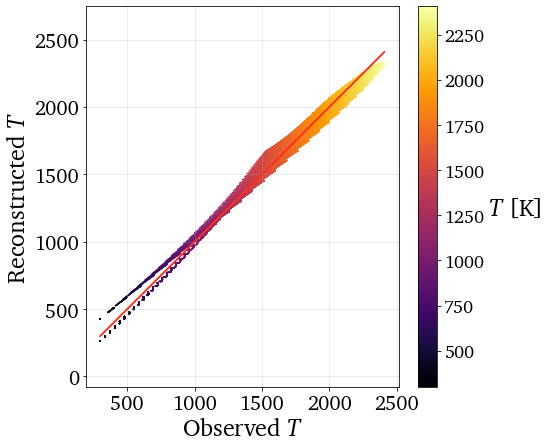

In [34]:
if save_plots: save_filename = '../images/plotting-pca-parity'
plt = reduction.plot_parity(X[:,0], X_rec[:,0], color_variable=X[:,0], x_label='Observed $T$', y_label='Reconstructed $T$', colorbar_label='$T$ [K]', color_map='inferno', figure_size=(7,7), save_filename=save_filename)

***